In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score


sns.set(style="whitegrid")

In [2]:
# Crypto data
btc = pd.read_csv("data/bitcoin_hourly.csv")
eth = pd.read_csv("data/ethereum_hourly.csv")
sol = pd.read_csv("data/solana_hourly.csv")

# Stock data
aapl = pd.read_csv("data/AAPL_data.csv")
googl = pd.read_csv("data/GOOGL_data.csv")
msft = pd.read_csv("data/MSFT_data.csv")

btc["Timestamp"] = pd.to_datetime(btc["Timestamp"], unit="ms")
eth["Timestamp"] = pd.to_datetime(eth["Timestamp"], unit="ms")
sol["Timestamp"] = pd.to_datetime(sol["Timestamp"], unit="ms")

aapl["Date"] = pd.to_datetime(aapl["Date"])
googl["Date"] = pd.to_datetime(googl["Date"])
msft["Date"] = pd.to_datetime(msft["Date"])


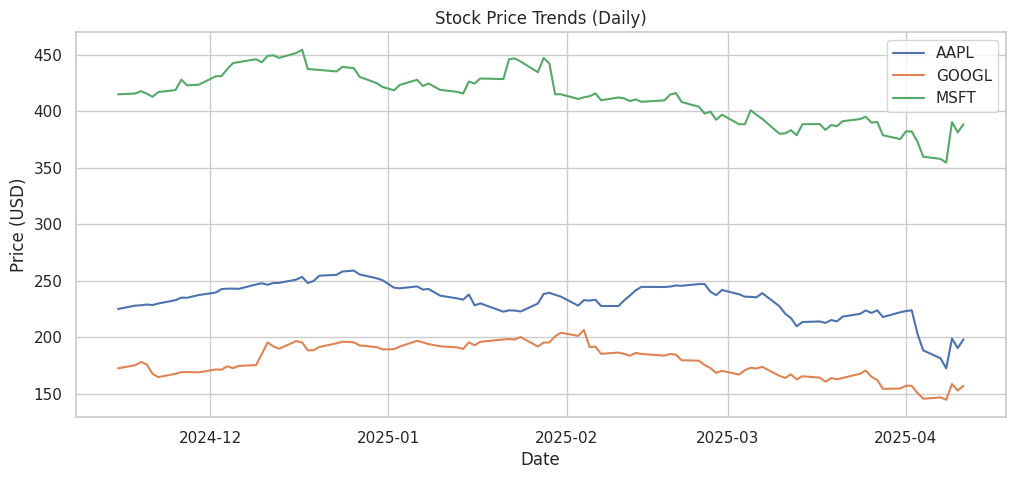

In [3]:
# Plot all 3 stocks' Close prices over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=aapl, x="Date", y="Close", label="AAPL")
sns.lineplot(data=googl, x="Date", y="Close", label="GOOGL")
sns.lineplot(data=msft, x="Date", y="Close", label="MSFT")
plt.title("Stock Price Trends (Daily)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


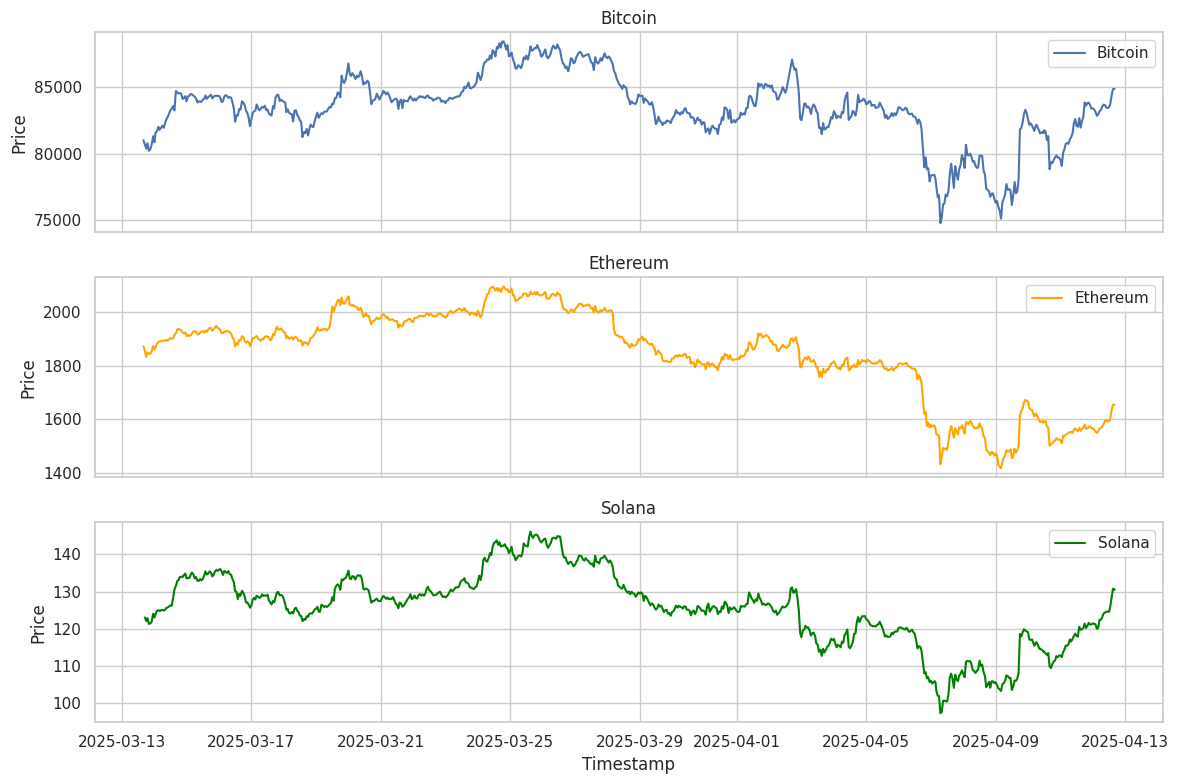

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

sns.lineplot(ax=axes[0], data=btc, x="Timestamp", y="Price", label="Bitcoin")
axes[0].set_title("Bitcoin")

sns.lineplot(ax=axes[1], data=eth, x="Timestamp", y="Price", label="Ethereum", color="orange")
axes[1].set_title("Ethereum")

sns.lineplot(ax=axes[2], data=sol, x="Timestamp", y="Price", label="Solana", color="green")
axes[2].set_title("Solana")

plt.tight_layout()
plt.show()


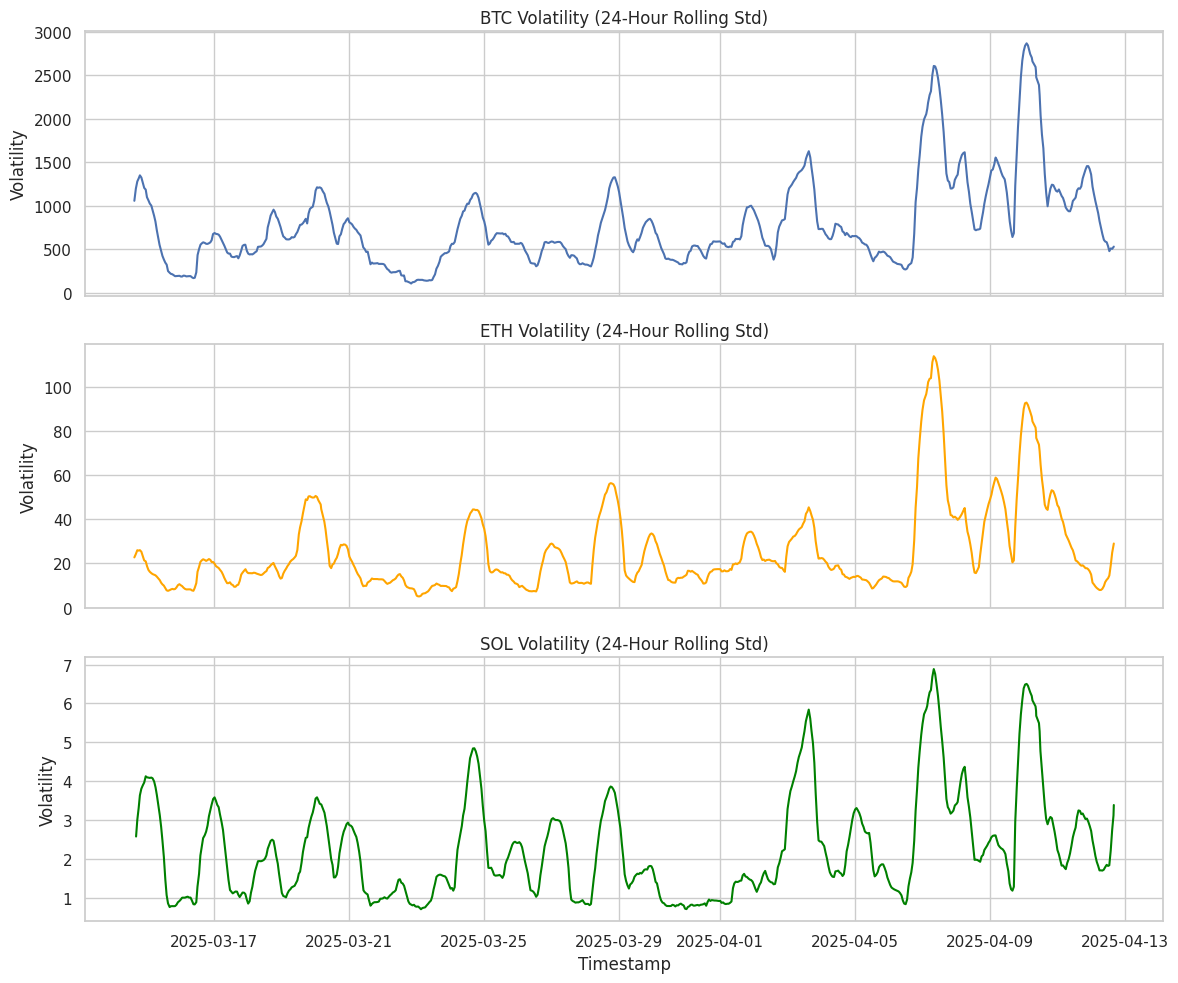

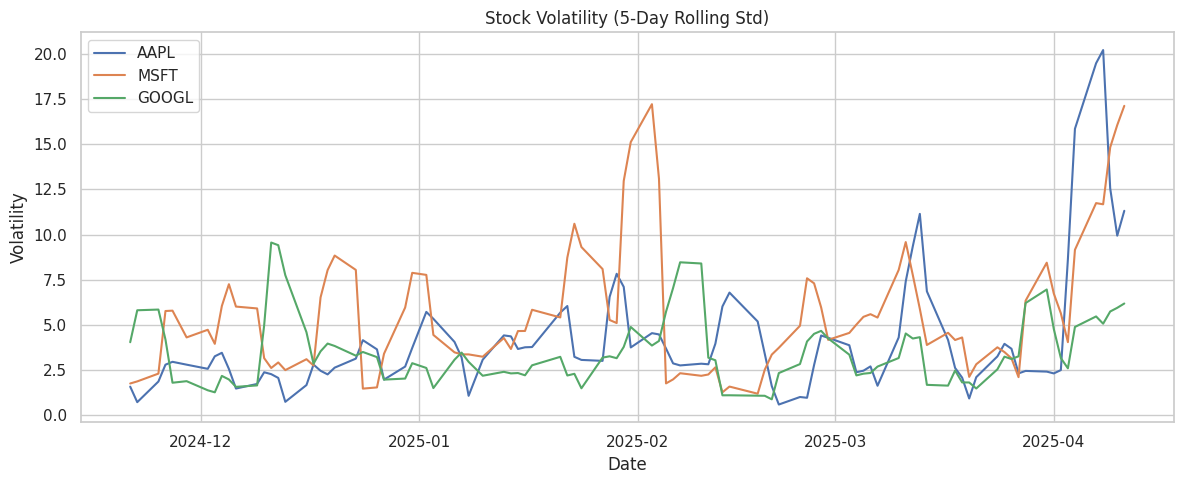

In [6]:
# Volatility Calculations
btc["volatility"] = btc["Price"].rolling(window=24).std()
eth["volatility"] = eth["Price"].rolling(window=24).std()
sol["volatility"] = sol["Price"].rolling(window=24).std()

aapl["volatility"] = aapl["Close"].rolling(window=5).std()
msft["volatility"] = msft["Close"].rolling(window=5).std()
googl["volatility"] = googl["Close"].rolling(window=5).std()

# Subplots for Crypto Volatility
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

sns.lineplot(data=btc, x="Timestamp", y="volatility", ax=axs[0])
axs[0].set_title("BTC Volatility (24-Hour Rolling Std)")
axs[0].set_ylabel("Volatility")

sns.lineplot(data=eth, x="Timestamp", y="volatility", ax=axs[1], color="orange")
axs[1].set_title("ETH Volatility (24-Hour Rolling Std)")
axs[1].set_ylabel("Volatility")

sns.lineplot(data=sol, x="Timestamp", y="volatility", ax=axs[2], color="green")
axs[2].set_title("SOL Volatility (24-Hour Rolling Std)")
axs[2].set_ylabel("Volatility")

plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


# Plotting Stock Volatility
plt.figure(figsize=(12, 5))
sns.lineplot(data=aapl, x="Date", y="volatility", label="AAPL")
sns.lineplot(data=msft, x="Date", y="volatility", label="MSFT")
sns.lineplot(data=googl, x="Date", y="volatility", label="GOOGL")
plt.title("Stock Volatility (5-Day Rolling Std)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
btc["price_change"] = btc["Price"].pct_change()
btc["rolling_avg"] = btc["Price"].rolling(window=24).mean()

In [7]:
# Example: Ridge Regression for price prediction
btc = btc.dropna()
X = btc[["rolling_avg", "volatility"]]
y = btc["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
print("MSE:", mse)


MSE: 1318800.5390763315


In [8]:
# Binary classification: Predict if BTC price will go UP (1) or DOWN (0)

# Create target column
btc["target"] = (btc["Price"].shift(-1) > btc["Price"]).astype(int)

# Drop NA rows
btc_clean = btc.dropna(subset=["rolling_avg", "volatility", "target"])

# Features and target
X = btc_clean[["rolling_avg", "volatility"]]
y = btc_clean["target"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
preds = rf.predict(X_test)
acc = accuracy_score(y_test, preds)

print("Random Forest Accuracy:", acc)


Random Forest Accuracy: 0.5285714285714286


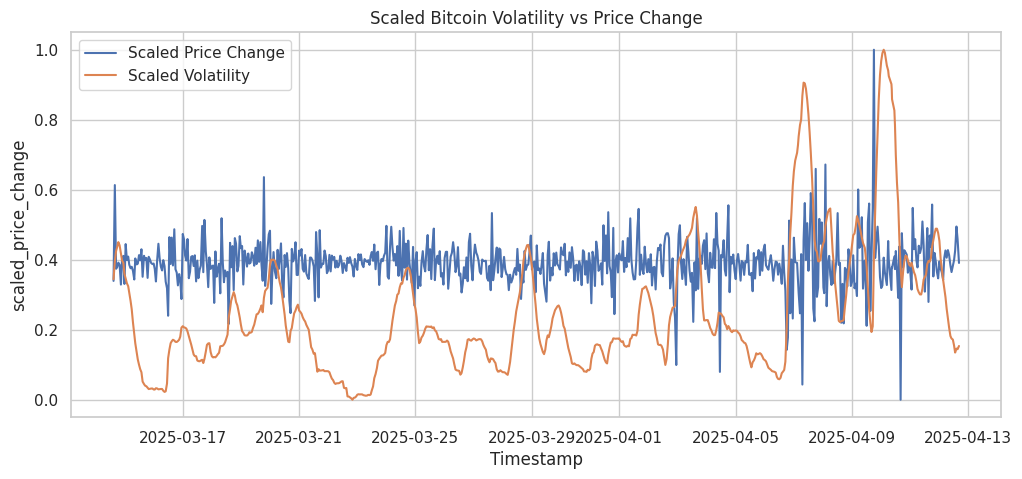

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Scale both columns to 0–1 range
scaler = MinMaxScaler()
btc_scaled = btc[["price_change", "volatility"]].dropna()
scaled_values = scaler.fit_transform(btc_scaled)
btc[["scaled_price_change", "scaled_volatility"]] = scaled_values

plt.figure(figsize=(12, 5))
sns.lineplot(data=btc, x="Timestamp", y="scaled_price_change", label="Scaled Price Change")
sns.lineplot(data=btc, x="Timestamp", y="scaled_volatility", label="Scaled Volatility")
plt.title("Scaled Bitcoin Volatility vs Price Change")
plt.legend()
plt.show()



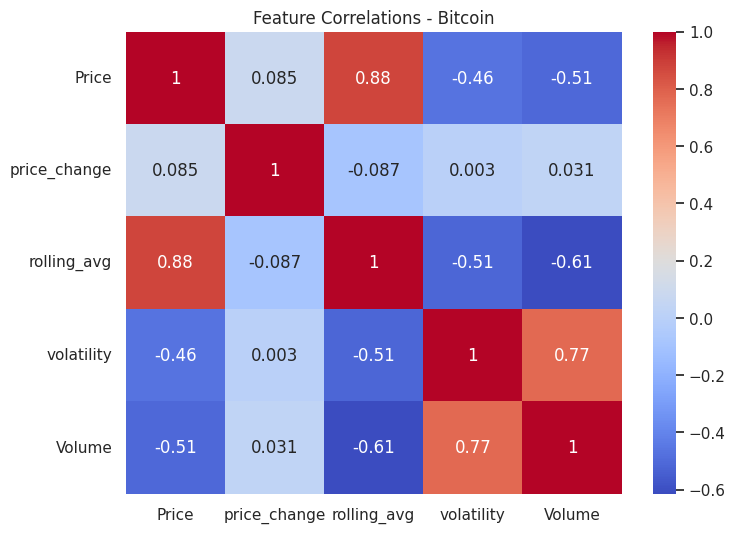

In [10]:

btc["Volume"] = btc["Volume"].astype(float)  # Ensure Volume is numeric
plt.figure(figsize=(8, 6))
sns.heatmap(btc[["Price", "price_change", "rolling_avg", "volatility", "Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations - Bitcoin")
plt.show()


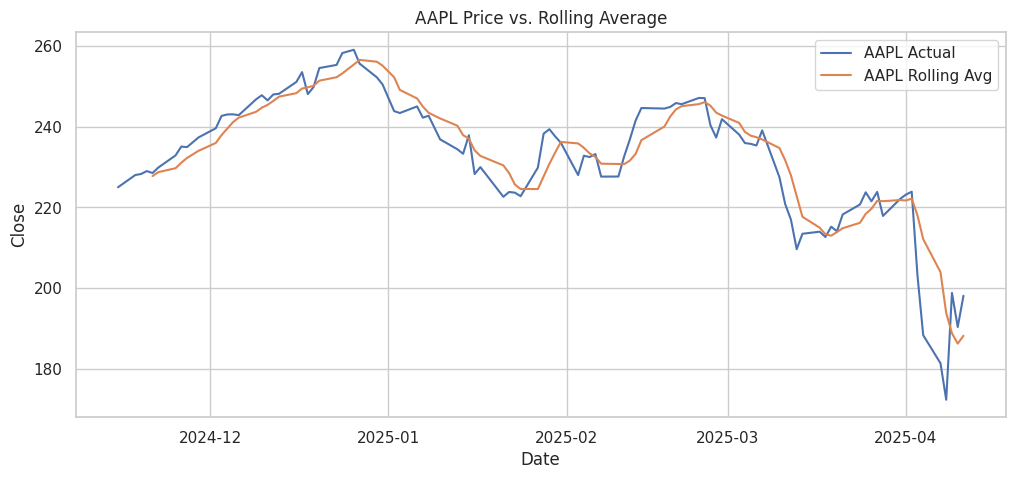

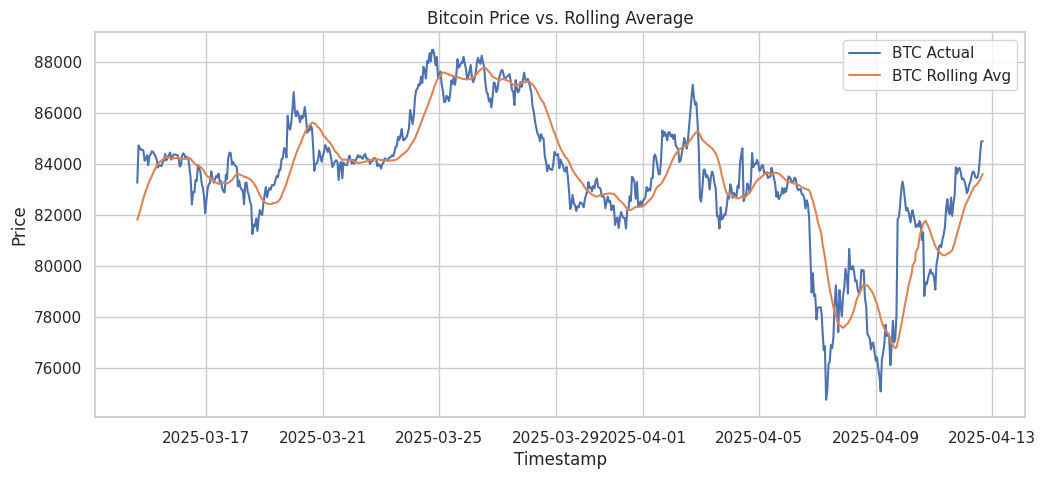

In [11]:
aapl["rolling_avg"] = aapl["Close"].rolling(window=5).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(data=aapl, x="Date", y="Close", label="AAPL Actual")
sns.lineplot(data=aapl, x="Date", y="rolling_avg", label="AAPL Rolling Avg")
plt.title("AAPL Price vs. Rolling Average")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=btc, x="Timestamp", y="Price", label="BTC Actual")
sns.lineplot(data=btc, x="Timestamp", y="rolling_avg", label="BTC Rolling Avg")
plt.title("Bitcoin Price vs. Rolling Average")
plt.show()


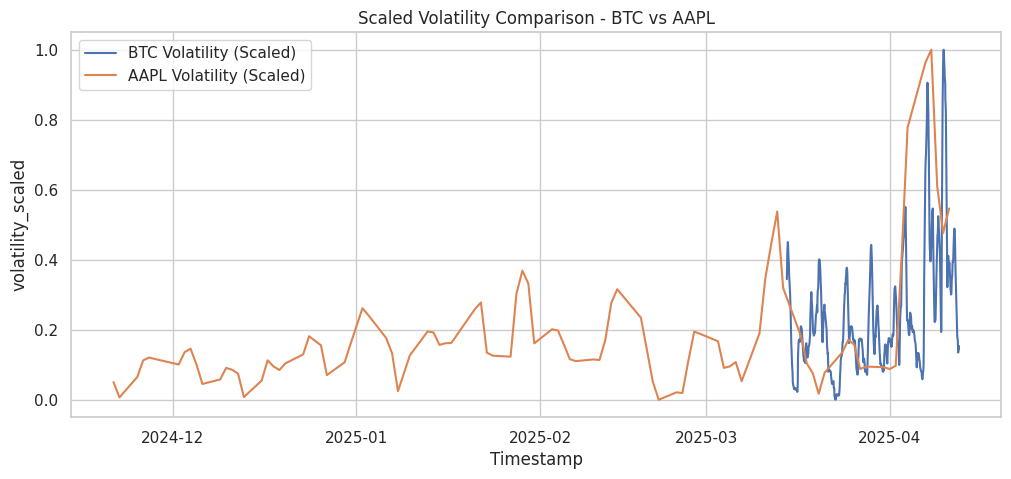

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
btc["volatility_scaled"] = scaler.fit_transform(btc[["volatility"]])
aapl["volatility_scaled"] = scaler.fit_transform(aapl[["volatility"]])

plt.figure(figsize=(12, 5))
sns.lineplot(data=btc, x="Timestamp", y="volatility_scaled", label="BTC Volatility (Scaled)")
sns.lineplot(data=aapl, x="Date", y="volatility_scaled", label="AAPL Volatility (Scaled)")
plt.title("Scaled Volatility Comparison - BTC vs AAPL")
plt.show()



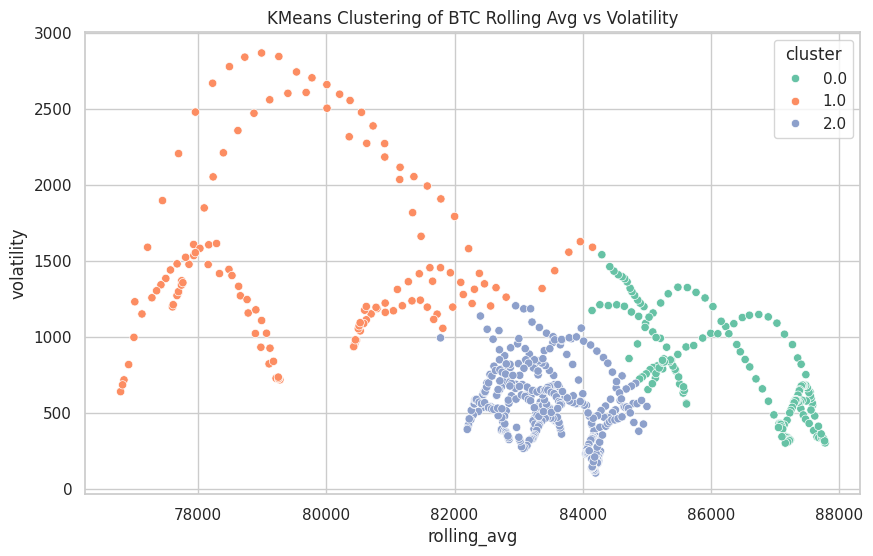

In [13]:
# KMeans Clustering on BTC to identify behavior patterns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = btc[["rolling_avg", "volatility"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
btc.loc[features.index, "cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=btc, x="rolling_avg", y="volatility", hue="cluster", palette="Set2")
plt.title("KMeans Clustering of BTC Rolling Avg vs Volatility")
plt.show()
